<a href="https://colab.research.google.com/github/allenphos/Study-projects/blob/main/Logistic_Regression_with_Scikit_Learn_Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression with Scikit-Learn: Bank Customer Churn Prediction 🚀

This notebook focuses on implementing logistic regression to predict customer churn for a bank. The dataset is sourced from a Kaggle competition: ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-2).. The goal is to determine whether a customer will continue using their bank account or close it.

I am participating in this competition and currently feature on the leaderboard. In this notebook, I am analyzing a dataset that contains information about bank customers, with the objective of understanding the factors that influence customer churn (whether a customer exits the bank).

The goal is to develop insights that can help in predicting customer exit and uncover key factors that may influence a customer’s decision to leave the bank. Through exploratory data analysis (EDA), data preprocessing, and applying machine learning models, I aim to derive actionable insights that can be valuable for improving customer retention strategies.

Key features of the **dataset** include:

- ID: Unique identifier for each row.
- Customer ID: Unique identifier for each customer (this field contains duplicates for different customer information, so it will be removed).
- Surname: The customer's surname.
- Credit Score: A numerical value representing the customer's credit score.
- Geography: The country where the customer lives (France, Spain, or Germany).
- Gender: The customer's gender (Male or Female).
- Age: The customer's age.
- Tenure: The number of years the customer has been with the bank.
- Balance: The customer's account balance.
- NumOfProducts: The number of banking products the customer uses (e.g., savings account, credit card).
- HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no).
- IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no).
- EstimatedSalary: The estimated salary of the customer.
- Exited: Whether the customer has exited the bank (1 = yes, 0 = no).

## 1. Imports

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, f1_score

!pip install opendatasets --upgrade --quiet

## 2. Loading the Dataset

In [2]:
import opendatasets as od

dataset_url = "https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-2"

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anastasiaalyoshkina
Your Kaggle Key: ··········


100%|██████████| 637k/637k [00:00<00:00, 21.9MB/s]


Extracting archive ./bank-customer-churn-prediction-dlu-course-c-2/bank-customer-churn-prediction-dlu-course-c-2.zip to ./bank-customer-churn-prediction-dlu-course-c-2


In [3]:
import os

data_dir = './bank-customer-churn-prediction-dlu-course-c-2'

os.listdir(data_dir)

['train.csv', 'sample_submission.csv', 'test.csv']

In [4]:
train_csv = data_dir + '/train.csv'

## 3. Data Preparation and Splitting

Reading the train.csv data into a pandas DataFrame and splitting it into train and validation subsets

In [5]:
raw_df = pd.read_csv(train_csv)

In [6]:
raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,15807989.0,Ch'iu,585.0,France,Male,33.0,3.0,0.00,1.0,1.0,0.0,54191.38,0.0
14996,14996,15731781.0,Ch'ang,678.0,France,Male,34.0,6.0,0.00,2.0,1.0,1.0,53437.10,0.0
14997,14997,15667093.0,Goliwe,678.0,France,Female,54.0,4.0,0.00,1.0,1.0,0.0,147720.29,1.0
14998,14998,15732644.0,Fanucci,705.0,Spain,Female,40.0,7.0,0.00,2.0,1.0,0.0,149550.95,0.0


In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [8]:
# Splitting data into training, validating and testing sets

train_val_df, test_df = train_test_split(raw_df, test_size=0.2, stratify=raw_df['Exited'], random_state=42) # both the training and testing sets have the same proportion of samples for each class as the original dataset
train_df, val_df = train_test_split(train_val_df, test_size=0.25, stratify=train_val_df['Exited'], random_state=42)

print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (9000, 14)
val_df.shape : (3000, 14)
test_df.shape : (3000, 14)


## 4. Feature Selection


In [9]:
input_cols = list(train_df.columns)[3:-1] # Removing columns that don't make sense for the model: 'id', 'Surname' and target
target_col = 'Exited'

print(input_cols)

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [10]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

print('train_inputs.shape :', train_inputs.shape)
print('val_inputs.shape :', val_inputs.shape)

train_inputs.shape : (9000, 10)
val_inputs.shape : (3000, 10)


## 5. Identifying Numeric and Categorical Features

In [11]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist() # filters the DataFrame, selecting only the columns that contain numerical data types
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [12]:
numeric_cols, categorical_cols

(['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary'],
 ['Geography', 'Gender'])

## 6. Data Preprocessing

### Handling Numeric Features

- Checking for missing values.
- Detecting outliers using the Interquartile Range (IQR).


In [13]:
raw_df[numeric_cols].isna().sum()

,0
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [14]:
train_inputs[numeric_cols].describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00
mean,658.58,37.68,5.02,43029.89,1.59,0.79,0.49,117966.92
std,72.00,8.12,2.78,59826.88,0.53,0.41,0.50,45719.05
min,431.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58
25%,603.00,32.00,3.00,0.00,1.00,1.00,0.00,83092.52
50%,661.00,37.00,5.00,0.00,2.00,1.00,0.00,123542.16
75%,708.00,42.00,7.00,109735.03,2.00,1.00,1.00,157097.09
max,850.00,72.00,10.00,209767.31,4.00,1.00,1.00,199992.48


In [15]:
Q1 = train_inputs['Balance'].quantile(0.25)
Q3 = train_inputs['Balance'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

109735.0325


In [16]:
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Minimum value, up to which outliers exist: {}".format(Min_value))
print("Maximum value, after which outliers exist: {}".format(Max_value))

Minimum value, up to which outliers exist: -164602.54875000002
Maximum value, after which outliers exist: 274337.58125000005


In [17]:
import warnings

def dist_box(dataset, column):
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")

      plt.figure(figsize=(16,6))

      plt.subplot(1,2,1)
      sns.distplot(dataset[column], color = 'purple')
      pltname = 'Distribution plot for ' + column
      plt.ticklabel_format(style='plain', axis='x')
      plt.title(pltname)

      plt.subplot(1,2,2)
      red_diamond = dict(markerfacecolor='r', marker='D')
      sns.boxplot(y = column, data = dataset, flierprops = red_diamond)
      pltname = 'Boxplot for ' + column
      plt.title(pltname)

      plt.show()

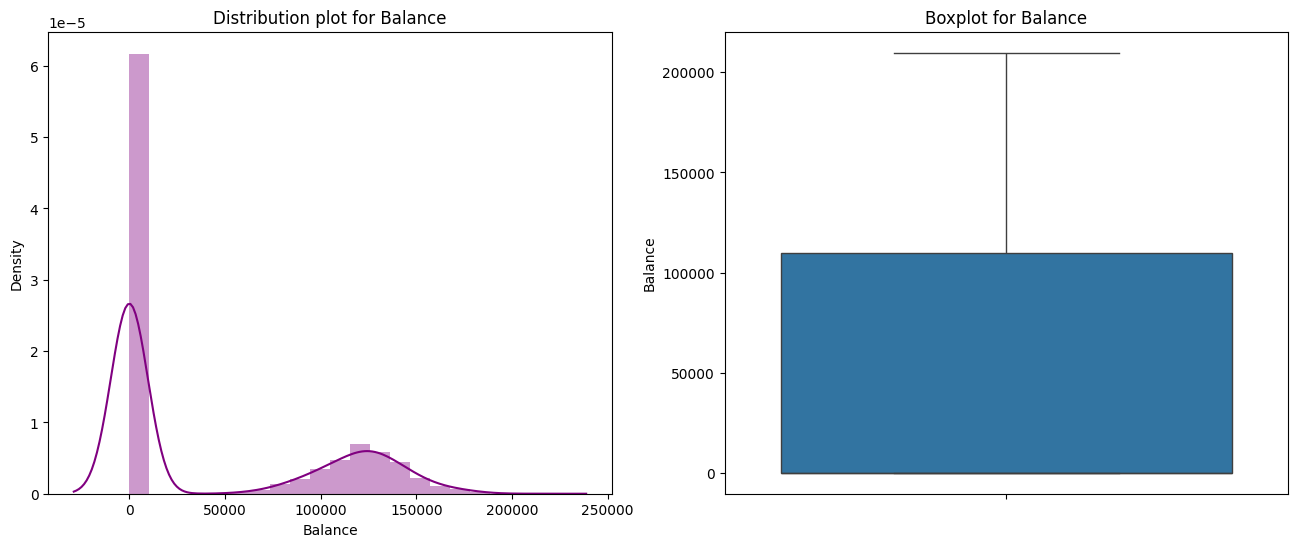

In [18]:
dist_box(train_inputs, 'Balance')

From the graph, it can be seen that there are no outliers, but the data is widely dispersed. It is necessary to scale the data so that it is within the same range and there are no dominant columns. For logistic regression, it is better to use StandardScaler

#### Scaling numeric features  

Scaling numeric features using StandardScaler ensures they are within the same range, preventing any single feature from having a disproportionate impact on the model's loss and enabling optimization algorithms to work more effectively."

In [21]:
scaler = StandardScaler()
scaler.fit(train_inputs[numeric_cols])

StandardScaler()

In [22]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

In [23]:
train_inputs[numeric_cols].describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.16,-2.42,-1.81,-0.72,-1.11,-1.94,-0.98,-2.58
25%,-0.77,-0.70,-0.73,-0.72,-1.11,0.51,-0.98,-0.76
50%,0.03,-0.08,-0.01,-0.72,0.77,0.51,-0.98,0.12
75%,0.69,0.53,0.71,1.12,0.77,0.51,1.02,0.86
max,2.66,4.23,1.79,2.79,4.52,0.51,1.02,1.79


### Handling Categorical Features

One-Hot Encoding is applied to the categorical variables 'Gender' and 'Geography' using OneHotEncoder, as this encoder is suitable for handling categories without an inherent order.

In [24]:
train_inputs[categorical_cols].nunique()

,0
Geography,3
Gender,2


In [25]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoder.fit(train_inputs[categorical_cols])

encoded_cols = list(encoder.get_feature_names_out(categorical_cols)) # Generate column names for each individual category
print(encoded_cols)

['Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']


In [26]:
encoder.transform(train_inputs[categorical_cols])

array([[1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.]])

In [27]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [28]:
train_inputs = train_inputs[numeric_cols + encoded_cols]
val_inputs = val_inputs[numeric_cols + encoded_cols]

In [29]:
# Displaying the transformed datasets
pd.set_option('display.max_columns', None)
display(train_inputs.head()), display(val_inputs.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
63,1.172656,-0.206530,-0.006364,-0.719280,0.770093,-1.942165,1.019751,-0.614074,1.0,0.0,0.0,0.0,1.0
13717,-0.716375,-0.329644,0.353839,-0.719280,0.770093,0.514889,1.019751,0.760490,1.0,0.0,0.0,0.0,1.0
13292,1.617134,-0.575872,0.353839,1.309285,-1.105641,0.514889,-0.980632,0.507155,1.0,0.0,0.0,1.0,0.0
9615,-1.008063,1.270836,-1.447176,-0.719280,-1.105641,-1.942165,1.019751,0.699518,0.0,0.0,1.0,0.0,1.0
1618,0.714288,-0.698986,-0.006364,-0.719280,0.770093,0.514889,-0.980632,-1.084221,1.0,0.0,0.0,0.0,1.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
4434,-1.383091,0.285925,0.714042,1.514424,-1.105641,-1.942165,1.019751,1.457127,1.0,0.0,0.0,0.0,1.0
8707,1.158766,-0.452758,0.714042,-0.719280,0.770093,-1.942165,1.019751,1.057622,1.0,0.0,0.0,0.0,1.0
679,1.589354,-0.452758,0.714042,-0.719280,0.770093,0.514889,-0.980632,-0.524183,1.0,0.0,0.0,0.0,1.0
4765,-0.827494,0.162811,-0.366567,-0.719280,0.770093,0.514889,1.019751,0.193142,1.0,0.0,0.0,0.0,1.0
9354,0.658728,0.162811,1.434448,0.947519,0.770093,0.514889,1.019751,0.272059,0.0,1.0,0.0,1.0,0.0


(None, None)

Saving data to disk in Parquet format

In [33]:
!pip install pyarrow --quiet

train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')

pd.DataFrame(train_targets).to_parquet('train_targets.parquet') # 'Series' 'to_parquet'
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')

## 7. Model Training: Logistic Regression

In [34]:
X_train = pd.read_parquet('train_inputs.parquet')
X_val = pd.read_parquet('val_inputs.parquet')

y_train = pd.read_parquet('train_targets.parquet')
y_val = pd.read_parquet('val_targets.parquet')

In [35]:
model = LogisticRegression(solver='liblinear')

model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [36]:
train_preds = model.predict(X_train)

In [37]:
train_preds

array([0., 0., 0., ..., 0., 0., 0.])

The probabilistic predictions are obtained by calling predict_proba

In [38]:
train_probs = model.predict_proba(X_train) # returns an array of probabilities for each class
train_probs # Example: 80% chance of not churning, 20% chance of churning

array([[0.98322375, 0.01677625],
       [0.98214408, 0.01785592],
       [0.87058278, 0.12941722],
       ...,
       [0.90641466, 0.09358534],
       [0.88901701, 0.11098299],
       [0.86302115, 0.13697885]])

(array([4860., 1380.,  641.,  451.,  355.,  303.,  230.,  220.,  290.,
         270.]),
 array([0.00110373, 0.1004832 , 0.19986266, 0.29924213, 0.3986216 ,
        0.49800107, 0.59738054, 0.69676001, 0.79613948, 0.89551894,
        0.99489841]),
 <BarContainer object of 10 artists>)

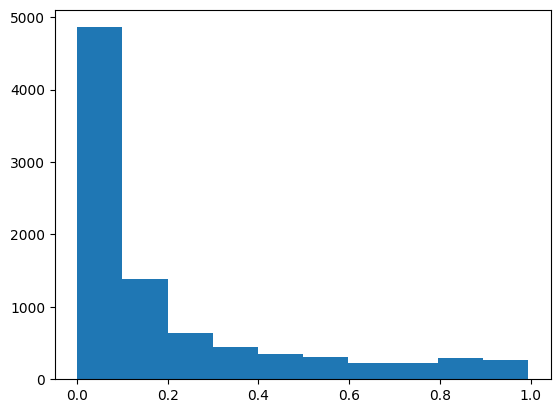

In [39]:
plt.hist(train_probs[:,1]) # histogram to visualize the distribution of probabilities for customers churning
# 1 This array represents the frequencies (counts) of data points within each bin of the histogram ( approximately 4860 data points in the first bin)
# 2 This array represents the edges of the bins in the histogram

In [40]:
(train_probs[:,1][:20]>0.2).astype(int) #  ,1 predicted probabilities of the positive class

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [41]:
train_probs[:,1].round(2)[:20] # all the rows (:) from the second column (1)

array([0.02, 0.02, 0.13, 0.37, 0.03, 0.02, 0.02, 0.39, 0.47, 0.03, 0.12,
       0.04, 0.05, 0.05, 0.03, 0.13, 0.03, 0.54, 0.47, 0.09])

In [42]:
train_targets.value_counts(normalize=True)

,proportion
Exited,
0.0,0.796556
1.0,0.203444


## 8. Model Predictions and Evaluation

### **Confusion Matrix and Accuracy**



In [43]:
accuracy_score(train_targets, train_preds)

0.8737777777777778

In [44]:
confusion_matrix(train_targets, train_preds)

array([[6866,  303],
       [ 833,  998]])

Function for generating predictions, calculating accuracy, and building a confusion matrix for a given set of input data.

In [45]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 87.38%


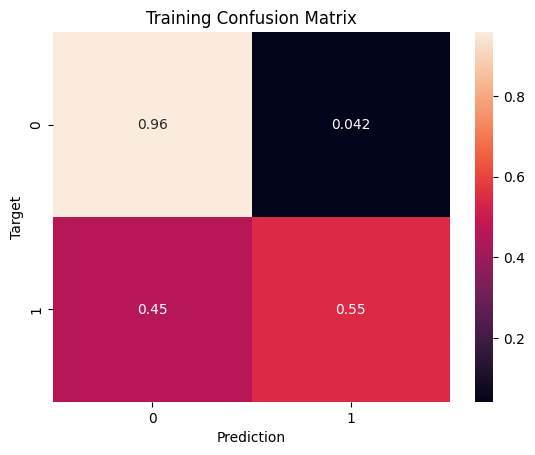

In [46]:
train_preds = predict_and_plot(X_train, y_train, 'Training')

Accuracy: 87.27%


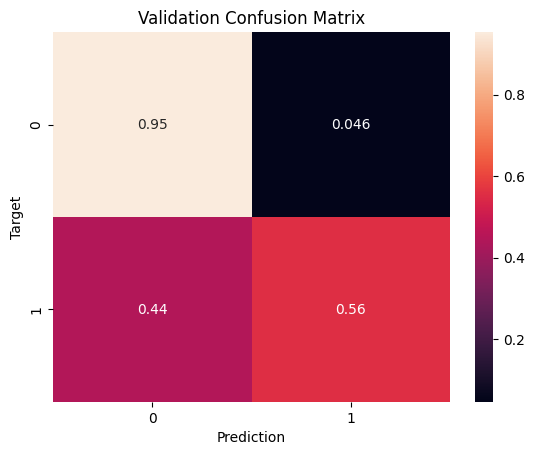

In [47]:
val_preds = predict_and_plot(X_val, y_val, 'Validation')

The model's accuracy on the validation set exceeds 87%, which indicates that the model generalizes well to data it has not seen before.

### F1 Score

The F1 metric is calculated as the harmonic mean between Precision and Recal.

In [48]:
preds = model.predict(X_train)
preds[:5], y_train[:5]

(array([0., 0., 0., 0., 0.]),
        Exited
 63        0.0
 13717     0.0
 13292     0.0
 9615      1.0
 1618      0.0)

In [49]:
f1_score(y_train, preds, pos_label=1) #  By default, LogisticRegression uses a threshold of 0.5 to convert probabilities into class labels (0 or 1).

0.6372924648786717

In [50]:
def get_f1_score(inputs, targets, name=''):
  preds = model.predict(inputs)

  f1_score_ = f1_score(targets, preds, pos_label=1)
  print(f"F1 score {name}: {f1_score_:.2f}%")

get_f1_score(X_train, y_train, 'Training')
get_f1_score(X_val, y_val, 'Validation')

F1 score Training: 0.64%
F1 score Validation: 0.64%


Model has a reasonable balance between precision and recall, and correctly identifying a decent portion of the positive class (customer churn) while not having too many false positives.

### Building the ROC Curve and calculating the AUROC for the model

In [51]:
def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1)

  # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.2f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

AUROC for Training: 0.88


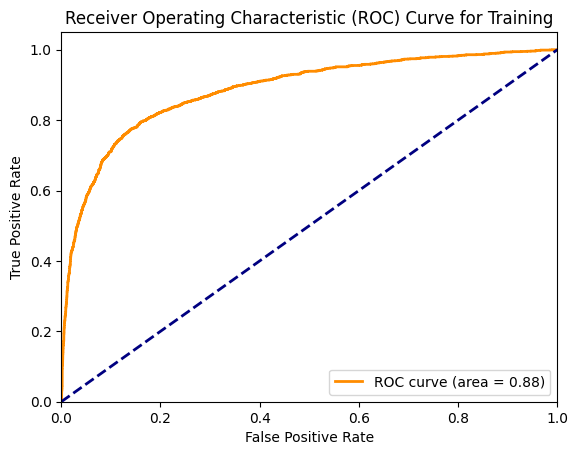

AUROC for Validation: 0.88


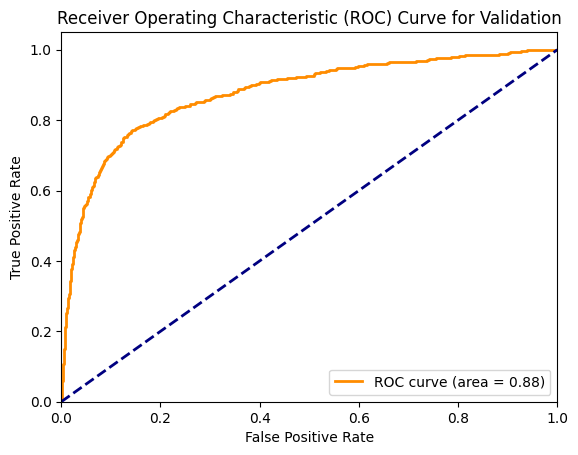

In [52]:
compute_auroc_and_build_roc(X_train, y_train, 'Training')
compute_auroc_and_build_roc(X_val, y_val, 'Validation')

The F1 Score value of 64% and AUROC of 88% are quite high, indicating that the model has learned well to distinguish between negative and positive classes. The ROC curve is close to the TPR, and the Confusion Matrix and accuracy have good indicators.



---



Creating predictions using a model that always predicts the majority class (the one with more instances in the training data) to compare Accuracy scores.

To verify if the model has truly learned something, it can be compared to the results of a "negative" model, which always returns "No" or 0.

In [53]:
def all_no(inputs):
    return np.full(len(inputs), 0)

print('Accuracy score for negative class on train set', accuracy_score(y_train, all_no(X_train)))
print('Accuracy score for negative class on validation set', accuracy_score(y_val, all_no(X_val)))

Accuracy score for negative class on train set 0.7965555555555556
Accuracy score for negative class on validation set 0.7963333333333333


A trivial model, which always predicts the negative class (absence of customer churn), demonstrates 80% accuracy. This indicates that the Accuracy metric can be misleading in this case, as most customers do not actually churn. Therefore, the high accuracy of the trivial model does not guarantee its effectiveness.